# The Ruixiang Wang's Assignment-Model
Name: Wang Ruixiang<br>
Student_ID: 20193493<br>
Data: 2022/1/7<br>
Description: This assignment aim to figure out how to implement netural networks in model subclassing methods.

## OverView

Before I start my assignment, I would like to answer the question why we need to use the Model subclassing.<br>
Model subclassing is **fully-customizable** and **enables you to implement your own custom forward-pass of the model**.<br>
However, this **flexibility and customization** comes at a cost — **model subclassing is way harder to utilize than the Sequential API or Functional API.**<br>
When we wish to have **control over every nuance of the network and training process** — and that’s exactly what model subclassing provides them.<br>
there are content of this jupter notebook:<br>
**PART1 Implementing VGG structures using the Model subclassing**<br>
**PART2 Implementing RNN structure using the Model subclassing**<br>

## PART1 Implementing VGG structures using the Model subclassing

**Step1: Importing datasets and some library**

In [1]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib
matplotlib.use("Agg")
import logging
from tensorflow import keras
from tensorflow.keras import layers
logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt
import numpy as np
import argparse
from PIL import Image
import matplotlib
# matplotlib.use('TkAgg')
from matplotlib import pyplot as pl
import seaborn as sns 

In [2]:
# We will Normalise the dataset to scale it between 0 and 1, which is an optional task
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

**Step2: Constructing the VGG model**

In [3]:
class my_vgg_model(Model):
	def __init__(self, classes, chanDim=-1):
		super(my_vgg_model, self).__init__()
        
		# initialize the layers in the first (CONV => RELU) * 2 => POOL
		self.conv1A = Conv2D(28, (3, 3), padding="same")
		self.act1A = Activation("relu")
		self.bn1A = BatchNormalization(axis=chanDim)
		self.conv1B = Conv2D(28, (3, 3), padding="same")
		self.act1B = Activation("relu")
		self.bn1B = BatchNormalization(axis=chanDim)
		self.pool1 = MaxPooling2D(pool_size=(2, 2))

		# initialize the layers in the second (CONV => RELU) * 2 => POOL
		self.conv2A = Conv2D(28, (3, 3), padding="same")
		self.act2A = Activation("relu")
		self.bn2A = BatchNormalization(axis=chanDim)
		self.conv2B = Conv2D(28, (3, 3), padding="same")
		self.act2B = Activation("relu")
		self.bn2B = BatchNormalization(axis=chanDim)
		self.pool2 = MaxPooling2D(pool_size=(2, 2))

		# initialize the layers in our fully-connected layer set
		self.flatten = Flatten()
		self.dense3 = Dense(448)
		self.act3 = Activation("relu")
		self.bn3 = BatchNormalization()
		self.do3 = Dropout(0.5)

		# initialize the layers in the softmax classifier layer set
		self.dense4 = Dense(classes)
		self.softmax = Activation("softmax")
        
	def call(self, inputs):
		# build the first (CONV => RELU) * 2 => POOL layer set
		x = self.conv1A(inputs)
		x = self.act1A(x)
		x = self.bn1A(x)
		x = self.conv1B(x)
		x = self.act1B(x)
		x = self.bn1B(x)
		x = self.pool1(x)

		# build the second (CONV => RELU) * 2 => POOL layer set
		x = self.conv2A(x)
		x = self.act2A(x)
		x = self.bn2A(x)
		x = self.conv2B(x)
		x = self.act2B(x)
		x = self.bn2B(x)
		x = self.pool2(x)

		# build our FC layer set
		x = self.flatten(x)
		x = self.dense3(x)
		x = self.act3(x)
		x = self.bn3(x)
		x = self.do3(x)

		# build the softmax classifier
		x = self.dense4(x)
		x = self.softmax(x)

		# return the constructed model
		return x

In [4]:
# instantiate a Keras Functional model
print("[INFO] using vgg_subclassing model...")
vgg_model = my_vgg_model(10)

[INFO] using vgg_subclassing model...


In [5]:
# initialize the initial learning rate, batch size, and number of
INIT_LR = 0.1
BATCH_SIZE = 100
NUM_EPOCHS = 10

opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
print("[INFO] training network...")
vgg_model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


**Step3: Model training**

In [6]:
# train the network
H = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.5290 - accuracy: 0.9041 - val_loss: 0.0489 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.1108 - accuracy: 0.9704 - val_loss: 0.0433 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0933 - accuracy: 0.9740 - val_loss: 0.0376 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0844 - accuracy: 0.9758 - val_loss: 0.0364 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0833 - accuracy: 0.9757 - val_loss: 0.0348 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0725 - accuracy: 0.9786 - val_loss: 0.0350 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0754 - accuracy: 0.9782 - val_loss: 0

In [7]:
vgg_model.summary()

Model: "my_vgg_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  280       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  112       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7084      
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                 

**Step4: Model evaluation**

In [8]:
print("[INFO] evaluating network...")

[INFO] evaluating network...


In [9]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
val_loss_01, val_acc_01 = vgg_model.evaluate(test_images, test_labels)
print(val_loss_01, val_acc_01)

313/313 [==============================] - 3s 10ms/step - loss: 0.0336 - accuracy: 0.9881
0.033573079854249954 0.988099992275238


In [10]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions = vgg_model.predict(test_images, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



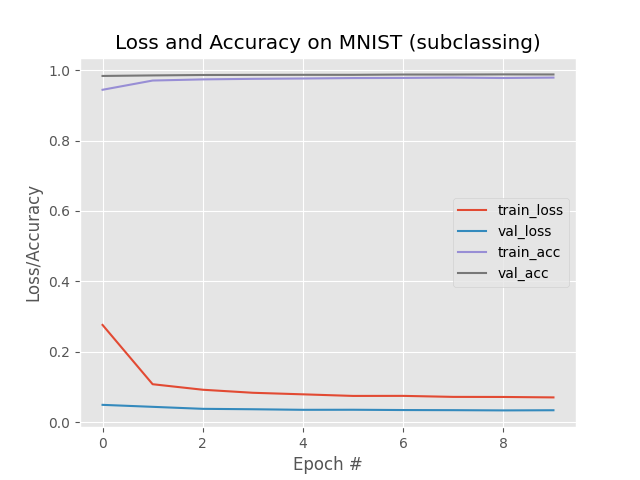

In [11]:
N = np.arange(0, NUM_EPOCHS)
title = "Loss and Accuracy on MNIST (subclassing)"
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("my_vgg_model_subclassing_plot.png")
display(Image.open("my_vgg_model_subclassing_plot.png"))

In [12]:
# Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels.argmax(axis=1),predictions.argmax(axis=1))
print(confusion_matrix) 

[[ 975    0    1    0    0    0    1    1    2    0]
 [   0 1127    4    0    1    0    2    0    1    0]
 [   2    2 1024    0    0    0    0    3    1    0]
 [   0    1    1 1000    0    4    0    0    2    2]
 [   0    0    1    0  973    0    2    0    1    5]
 [   2    0    1    6    0  879    2    0    1    1]
 [   5    4    0    0    1    3  944    0    1    0]
 [   0    3    6    4    0    0    0 1011    0    4]
 [   3    0    3    1    1    2    0    1  959    4]
 [   0    3    0    2    6    1    1    4    3  989]]


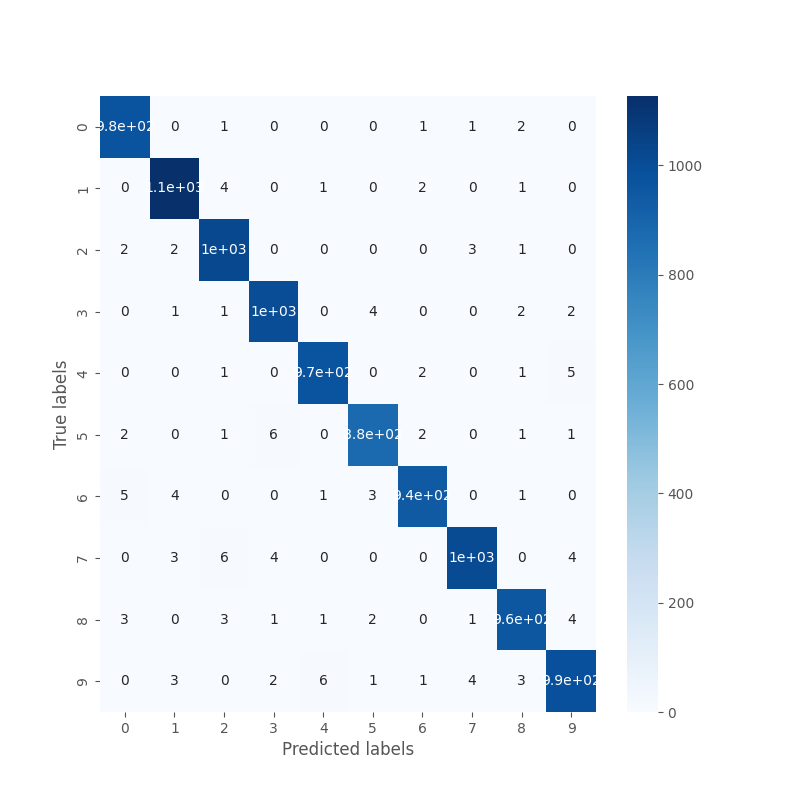

In [13]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

plt.ylim(10, 0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("confusion_matrix_2.png")
display(Image.open("confusion_matrix_2.png"))

**Step5: Save Our Model**

In [14]:
# Save this DL Model for the future use
vgg_model.save('vgg_subclassing.model1')

In [15]:
# Load the previously saved DL Model for Prediction
num_model_02 = tf.keras.models.load_model('vgg_subclassing.model1')

In [16]:
# Make Predictions using the loaded DL Model
predictions = num_model_02.predict(test_images)

In [17]:
# Display the Pridictions - Probability Distributions
print(predictions)

[[2.39142123e-10 2.00333812e-11 2.91807445e-09 ... 1.00000000e+00
  3.51926691e-12 1.24242494e-09]
 [1.81454320e-12 1.79547754e-08 9.99999404e-01 ... 7.62040431e-12
  1.37410561e-09 3.54975489e-13]
 [1.01576010e-08 9.99999166e-01 6.32402464e-11 ... 1.32023089e-07
  2.48918575e-08 1.35166167e-09]
 ...
 [7.38773626e-13 1.73119489e-07 1.22416478e-11 ... 3.73772444e-08
  2.24374797e-10 1.83522857e-07]
 [5.76294852e-08 5.52826838e-12 2.05822670e-09 ... 1.65115796e-10
  4.24929953e-04 3.68467590e-10]
 [2.88985902e-08 8.65835598e-11 8.58255405e-08 ... 2.06770209e-11
  1.08915586e-07 4.52502202e-10]]


## PART2 Implementing RNN structure using the Model subclassing

What is RNN? In my previous studies, I have learnt about FCNN and CNN, which can solve many practical problems, but they can only process one input individually, and the previous input is not related to the latter input at all. **In real life, there is often a back-and-forth connection between the input vectors,** i.e. the previous input is related to the latter input, e.g. text, speech, video, etc. Therefore, we need to understand another important class of neural networks in deep learning, which is recurrent neural networks. **Recurrent neural networks rely on an important concept: sequence**, i.e. the input vector is a sequence and there is a back-and-forth connection. Compared to the previous FCNNs, RNNs have an extra self-looping part in their structure. **RNNs now come in quite a few varieties, including LSTMs, GRUs and so on.** Thankfully, tensorflow 2.0 has done a good job of encapsulating these main elements for us, and we can quickly build network model structures with keras.layers.RNN, keras.layers.LSTM and keras.layers.GRU

The use of CNNs to identify MNIST datasets is well understood, it is using the spatial information of the images. However, RNN requires the input vectors to be sequences, the size of an image is 28\*28 we consider each column of vectors as a vector at a certain moment, then each image is a sequence containing 28 vectors, each vector contains 28 elements,and **consider each row of pixels as a time step**.

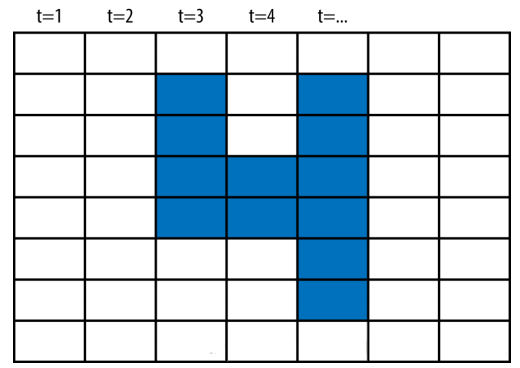

**Step1: Constructing the RNN model**

In [18]:
class my_simpleRnn_model(Model):
    def __init__(self):
        super(my_simpleRnn_model, self).__init__()
        self.lstm_layer = keras.layers.LSTM(64, input_shape=(None, 28))
        self.norm_layer = keras.layers.BatchNormalization()
        self.dense_layer = keras.layers.Dense(10)
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.norm_layer(x)
        x = self.dense_layer(x)
        return x 

In [19]:
class my_gru_model(Model):
    def __init__(self):
        super(my_gru_model, self).__init__()
        self.gru_layer = keras.layers.GRU(256, return_sequences=True)
        self.rnn_layer = keras.layers.SimpleRNN(64, input_shape=(None, 28))
        self.norm_layer = keras.layers.BatchNormalization()
        self.dense_layer = keras.layers.Dense(10)
    def call(self, inputs):
        x = self.gru_layer(inputs)
        x = self.rnn_layer(x)
        x = self.norm_layer(x)
        x = self.dense_layer(x)
        return x 

In [20]:
class my_biRnn_model(Model):
    def __init__(self):
        super(my_biRnn_model, self).__init__()
        self.bi_layer1 = keras.layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(None, 28))
        self.bi_layer2 = keras.layers.Bidirectional(layers.LSTM(32))
        self.norm_layer = keras.layers.BatchNormalization()
        self.dense_layer = keras.layers.Dense(10)
    def call(self, inputs):
        x = self.bi_layer1(inputs)
        x = self.bi_layer2(x)
        x = self.norm_layer(x)
        x = self.dense_layer(x)
        return x 

In [21]:
simpleRnn_model = my_simpleRnn_model()

In [22]:
gru_model= my_gru_model()

In [23]:
biRnn_model = my_biRnn_model()

**Step2: Model training**

In [24]:
# Since we added a dimension to the mnist dataset before the vgg training, we can either read it fresh, or reshape it.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
print("[INFO] training network...")
simpleRnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="sgd",
	metrics=["accuracy"])
# train the network
L = simpleRnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1351 - accuracy: 0.6263 - val_loss: 0.3448 - val_accuracy: 0.8900
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3153 - accuracy: 0.9010 - val_loss: 0.2873 - val_accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1980 - accuracy: 0.9385 - val_loss: 0.1724 - val_accuracy: 0.9448
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1534 - accuracy: 0.9537 - val_loss: 0.1223 - val_accuracy: 0.9598
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1314 - accuracy: 0.9592 - val_loss: 0.1239 - val_accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1151 - accuracy: 0.9644 - val_loss: 0.1019 - val_accuracy: 0.9680
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1054 - accuracy: 0.9662 

In [26]:
simpleRnn_model.summary()

Model: "my_simple_rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  23808     
_________________________________________________________________
batch_normalization_5 (Batch multiple                  256       
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________


In [27]:
print("[INFO] training network...")
gru_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="sgd",
	metrics=["accuracy"])
# train the network
G = gru_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6581 - accuracy: 0.8026 - val_loss: 0.2516 - val_accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2827 - accuracy: 0.9167 - val_loss: 0.1931 - val_accuracy: 0.9416
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2152 - accuracy: 0.9362 - val_loss: 0.1595 - val_accuracy: 0.9516
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1850 - accuracy: 0.9466 - val_loss: 0.1442 - val_accuracy: 0.9561
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1658 - accuracy: 0.9509 - val_loss: 0.1316 - val_accuracy: 0.9599
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1463 - accuracy: 0.9578 - val_loss: 0.1368 - val_accuracy: 0.9591
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1397 - accuracy: 

In [28]:
gru_model.summary()

Model: "my_gru_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    multiple                  219648    
_________________________________________________________________
simple_rnn (SimpleRNN)       multiple                  20544     
_________________________________________________________________
batch_normalization_6 (Batch multiple                  256       
_________________________________________________________________
dense_3 (Dense)              multiple                  650       
Total params: 241,098
Trainable params: 240,970
Non-trainable params: 128
_________________________________________________________________


In [29]:
print("[INFO] training network...")
biRnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="sgd",
	metrics=["accuracy"])
# train the network
B = biRnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 41s 18ms/step - loss: 0.9555 - accuracy: 0.7041 - val_loss: 0.2820 - val_accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2811 - accuracy: 0.9136 - val_loss: 0.2250 - val_accuracy: 0.9249
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1789 - accuracy: 0.9450 - val_loss: 0.1369 - val_accuracy: 0.9548
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1468 - accuracy: 0.9549 - val_loss: 0.1444 - val_accuracy: 0.9517
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1196 - accuracy: 0.9625 - val_loss: 0.1164 - val_accuracy: 0.9593
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1091 - accuracy: 0.9655 - val_loss: 0.1294 - val_accuracy: 0.9580
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0941 - accuracy: 

In [30]:
biRnn_model.summary()

Model: "my_bi_rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  47616     
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  41216     
_________________________________________________________________
batch_normalization_7 (Batch multiple                  256       
_________________________________________________________________
dense_4 (Dense)              multiple                  650       
Total params: 89,738
Trainable params: 89,610
Non-trainable params: 128
_________________________________________________________________


**Step3: Model evaluation**

In [31]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
print("[INFO] evaluating network...")
val_loss_1, val_acc_1 = simpleRnn_model.evaluate(x_test, y_test)
print(val_loss_1, val_acc_1)

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9742
0.07786523550748825 0.9742000102996826


In [32]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
print("[INFO] evaluating network...")
val_loss_2, val_acc_2 = gru_model.evaluate(x_test, y_test)
print(val_loss_2, val_acc_2)

[INFO] evaluating network...
313/313 [==============================] - 2s 7ms/step - loss: 0.1183 - accuracy: 0.9650
0.11831793189048767 0.9649999737739563


In [33]:
# Calculate Validation Loss and Validation Accuracy and compare with above one
print("[INFO] evaluating network...")
val_loss_3, val_acc_3 = biRnn_model.evaluate(x_test, y_test)
print(val_loss_3, val_acc_3)

[INFO] evaluating network...
313/313 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9695
0.08718202263116837 0.9695000052452087


In [35]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions1 = simpleRnn_model.predict(x_test, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions1.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.94      0.99      0.96       982
           5       0.99      0.97      0.98       892
           6       0.96      0.99      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [36]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions2 = gru_model.predict(x_test, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions2.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.98      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.93      0.98      0.95       982
           5       0.96      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.93      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [37]:
# evaluate the network
labelNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions3 = biRnn_model.predict(x_test, batch_size=BATCH_SIZE)
print(classification_report(test_labels.argmax(axis=1),
	predictions3.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.90      1.00      0.95       892
           6       0.99      0.97      0.98       958
           7       0.98      0.95      0.97      1028
           8       1.00      0.91      0.95       974
           9       0.93      0.99      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



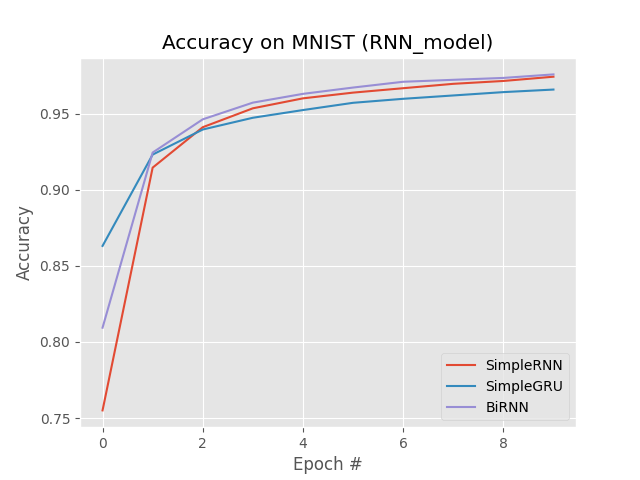

In [38]:
N = np.arange(0, 10)
title = "Accuracy on MNIST (RNN_model)"
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, L.history["accuracy"], label="SimpleRNN")
plt.plot(N, G.history["accuracy"], label="SimpleGRU")
plt.plot(N, B.history["accuracy"], label="BiRNN")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("my_rnn_model_plot.png")
display(Image.open("my_rnn_model_plot.png"))

**Step5: Save Our Model**

In [39]:
# Save this DL Model for the future use
simpleRnn_model.save('SimpleRNN.model1')

In [40]:
# Save this DL Model for the future use
gru_model.save('SimpleGRU.model1')

In [41]:
# Save this DL Model for the future use
biRnn_model.save('BiRNN.model1')

## Summary

In this assignment on model-subclassing, I introduce model-subclassing, which is very similar to functional APIs, but has disadvantages in time and space, but allows the researcher to better control our network structure intermediate processes. In this assignment, **I have implemented four network structures, VGG, three different rnn network structures,** VGG is a very good network structure and is much more efficient than the goolenet I used in my last assignment. In the rnn, I implemented simple rnn, simple gru and bidirectional rnn networks by treating each column vector of mnist as a time series input. I found that the rnn network was not as good as the vgg network in the training process, probably because the rnn network I designed was simpler. I am looking forward to future applications, but with the recent rise of transformer, more and more network structures are using transformer, and I still need to keep learning this.